# Kapotte moffen met een classificatiemodel

**Inhoud:**
1. [Installeer packages and laad de data](#1)
1. [Data Exploratie](#2)
1. [Preparee de data](#3)
1. [Analyse ](#4)
1. [Splits train- en testset](#5)
1. [Train en valideer de modellen](#6)


<a id="1"></a> 


## 1. Installeer packages en laad de data

In [1]:
# a) Installeer packages
import pandas as pd       # 'as' := we korten het package af voor veel gebruik
import numpy as np
import os
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier         # Modeling CART Decision Tree
from sklearn.ensemble import RandomForestClassifier     # Modeling Random Forest
from sklearn.ensemble import GradientBoostingClassifier # Modeling XGBoost
from sklearn import metrics                             # Performance statistieken
from sklearn.model_selection import train_test_split    # Split train-/testset
from sklearn.metrics import classification_report       # Performance rapport van classificatie model
from sklearn.metrics import f1_score,average_precision_score                    # f1 score of model
from six import StringIO                                # Nodig voor grafiek Decision Tree
from sklearn.tree import export_graphviz                # Nodig voor grafiek Decision Tree
import pydotplus                                        # Nodig voor grafiek Decision Tree
from IPython.display import Image                       # Nodig voor grafiek Decision Tree
from sklearn.tree import export_graphviz                # Nodig voor grafiek Decision Tree
import graphviz as gv                                   # Nodig voor grafiek Decision Tree


In [2]:
# b) Laad de data

inputdata = pd.read_csv("Gefaalde_Moffen.csv")

#    Krijg een overzicht van de data
inputdata.head(10)

,Unnamed: 0,GESTOORDASSET_TH05,GRONDZAKKING,ONTWATERINGSDIEPTE,DATUM_AANNEMEN_JAAR,DATUM_INBEDRIJF_JAAR,Age,COX1==COX2,"GRONDSOORT_Bebouwing, enz",GRONDSOORT_Leem,...,CONSTRUCTIE_COX_LOVINOL_2,CONSTRUCTIE_COX_LOVINOL_3,CONSTRUCTIE_COX_LOVINOL_4,CONSTRUCTIE_COX_LOVINOL_5,CONSTRUCTIE_COX_LOVINOL_6,CONSTRUCTIE_COX_Massamof,CONSTRUCTIE_COX_Nekaldietmof,CONSTRUCTIE_COX_Oliemof,CONSTRUCTIE_COX_Onbekend,CONSTRUCTIE_COX_Overig
0,74020,False,1,-5.0,1966.0,1966.0,52.0,True,1,0,...,0,0,0,0,0,1,0,0,0,0
1,116335,False,1,-1.5,2015.0,2015.0,3.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
2,182742,False,0,-1.0,1993.0,1993.0,25.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,186086,False,0,-2.0,1990.0,1990.0,28.0,False,1,0,...,0,0,0,0,0,0,0,1,0,0
4,86441,False,1,0.0,1916.0,1916.0,102.0,True,1,0,...,0,0,0,0,0,1,0,0,0,0
5,6290,False,1,-4.0,1985.0,NaN,33.0,True,1,0,...,0,0,0,1,0,0,0,0,0,0
6,10974,False,0,0.5,1973.0,NaN,45.0,False,1,0,...,0,0,0,0,0,0,0,1,0,0
7,467762,True,1,0.0,2007.0,2007.0,6.0,False,0,0,...,0,0,0,0,0,0,0,0,0,0
8,477009,True,0,0.0,2004.0,2004.0,6.0,False,1,0,...,0,0,0,0,0,0,0,0,0,0
9,127971,False,0,-1.5,2017.0,2017.0,1.0,False,1,0,...,0,0,0,0,0,0,0,0,0,0


<a id="2"></a> 


## 2. Data Exploratie 

In [3]:
# a) Krijg een overzicht van de data
#    Krijg de hoeveelheid rijen en kolommen
print('(nrow, ncol):', inputdata.shape)     

#    Laat een korte samenvatting van de numerieke variabelen zien
inputdata.describe()                        # min/max, count, mean, std and percentiles

(nrow, ncol): (9430, 79)


,Unnamed: 0,GRONDZAKKING,ONTWATERINGSDIEPTE,DATUM_AANNEMEN_JAAR,DATUM_INBEDRIJF_JAAR,Age,"GRONDSOORT_Bebouwing, enz",GRONDSOORT_Leem,GRONDSOORT_Lichte klei,GRONDSOORT_Lichte zavel,...,CONSTRUCTIE_COX_LOVINOL_2,CONSTRUCTIE_COX_LOVINOL_3,CONSTRUCTIE_COX_LOVINOL_4,CONSTRUCTIE_COX_LOVINOL_5,CONSTRUCTIE_COX_LOVINOL_6,CONSTRUCTIE_COX_Massamof,CONSTRUCTIE_COX_Nekaldietmof,CONSTRUCTIE_COX_Oliemof,CONSTRUCTIE_COX_Onbekend,CONSTRUCTIE_COX_Overig
count,9430.000000,9430.000000,9430.000000,9430.000000,7371.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,...,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000,9430.000000
mean,202436.489714,0.337964,-2.323413,1991.970626,1995.297517,24.656840,0.426723,0.001060,0.085366,0.071368,...,0.020467,0.055037,0.010604,0.057370,0.006575,0.074337,0.075610,0.193743,0.023860,0.050053
std,167996.237553,0.473041,3.553061,18.416727,17.007232,18.450564,0.494628,0.032549,0.279440,0.257452,...,0.141597,0.228065,0.102436,0.232561,0.080822,0.262333,0.264387,0.395251,0.152621,0.218066
min,0.000000,0.000000,-72.000000,1916.000000,1916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75017.500000,0.000000,-2.500000,1978.000000,1983.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,146518.000000,0.000000,-2.000000,1996.000000,2000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,467006.750000,1.000000,-1.000000,2007.000000,2009.000000,37.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,485263.000000,1.000000,12.000000,2018.000000,2018.000000,102.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# b) Check het data type van iedere variabele
print(pd.DataFrame(inputdata.dtypes, columns=['Datatype']))

                                       Datatype
Unnamed: 0                                int64
GESTOORDASSET_TH05                         bool
GRONDZAKKING                              int64
ONTWATERINGSDIEPTE                      float64
DATUM_AANNEMEN_JAAR                     float64
DATUM_INBEDRIJF_JAAR                    float64
Age                                     float64
COX1==COX2                                 bool
GRONDSOORT_Bebouwing, enz                 int64
GRONDSOORT_Leem                           int64
GRONDSOORT_Lichte klei                    int64
GRONDSOORT_Lichte zavel                   int64
GRONDSOORT_Moerig op zand                 int64
GRONDSOORT_Veen                           int64
GRONDSOORT_Water                          int64
GRONDSOORT_Zand                           int64
GRONDSOORT_Zware klei                     int64
GRONDSOORT_Zware zavel                    int64
KABEL_COX1_GPLK                           int64
KABEL_COX1_GPLK_NA_1978                 

In [5]:
# c) Krijg een overzicht van de NULLS in de dataset
nulls = pd.DataFrame(inputdata.isnull().sum(), columns=['# NULLS'])        # Hoeveelheid NULLS 

lst={}                                                                     # Hoeveelheid NULLS als percentage
for col in inputdata.columns:                                       
    lst[col]=np.sum(inputdata.loc[:,col].isnull())/len(inputdata.loc[:,col])
percNulls = pd.DataFrame(pd.Series(lst), columns=['% NULLS'])

print(pd.concat([nulls, percNulls], axis=1))

                                        # NULLS   % NULLS
Unnamed: 0                                    0  0.000000
GESTOORDASSET_TH05                            0  0.000000
GRONDZAKKING                                  0  0.000000
ONTWATERINGSDIEPTE                            0  0.000000
DATUM_AANNEMEN_JAAR                           0  0.000000
DATUM_INBEDRIJF_JAAR                       2059  0.218346
Age                                           0  0.000000
COX1==COX2                                    0  0.000000
GRONDSOORT_Bebouwing, enz                     0  0.000000
GRONDSOORT_Leem                               0  0.000000
GRONDSOORT_Lichte klei                        0  0.000000
GRONDSOORT_Lichte zavel                       0  0.000000
GRONDSOORT_Moerig op zand                     0  0.000000
GRONDSOORT_Veen                               0  0.000000
GRONDSOORT_Water                              0  0.000000
GRONDSOORT_Zand                               0  0.000000
GRONDSOORT_Zwa

In [6]:
# analyseer de te voorspellen variabele
target = 'GESTOORDASSET_TH05'

inputdata[target].value_counts()

False    7076
True     2354
Name: GESTOORDASSET_TH05, dtype: int64

In [7]:
# analyseer dummies
df_defect = inputdata[inputdata['GESTOORDASSET_TH05']==1]
df_defect.groupby('CONSTRUCTIE_ORIG_Nekaldietmof').count()



,Unnamed: 0,GESTOORDASSET_TH05,GRONDZAKKING,ONTWATERINGSDIEPTE,DATUM_AANNEMEN_JAAR,DATUM_INBEDRIJF_JAAR,Age,COX1==COX2,"GRONDSOORT_Bebouwing, enz",GRONDSOORT_Leem,...,CONSTRUCTIE_COX_LOVINOL_2,CONSTRUCTIE_COX_LOVINOL_3,CONSTRUCTIE_COX_LOVINOL_4,CONSTRUCTIE_COX_LOVINOL_5,CONSTRUCTIE_COX_LOVINOL_6,CONSTRUCTIE_COX_Massamof,CONSTRUCTIE_COX_Nekaldietmof,CONSTRUCTIE_COX_Oliemof,CONSTRUCTIE_COX_Onbekend,CONSTRUCTIE_COX_Overig
CONSTRUCTIE_ORIG_Nekaldietmof,,,,,,,,,,,,,,,,,,,,,
0,1890,1890,1890,1890,1890,1433,1890,1890,1890,1890,...,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890
1,464,464,464,464,464,384,464,464,464,464,...,464,464,464,464,464,464,464,464,464,464


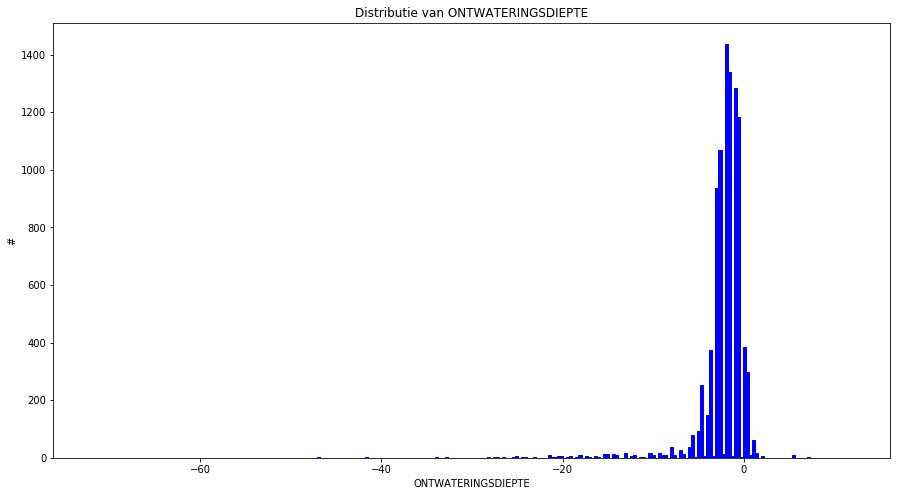

In [8]:
# f) Analyseer de distributie van continue variabelen
variable_analyzed = 'ONTWATERINGSDIEPTE'

plt.figure(figsize=(15,8))
plt.hist((inputdata[variable_analyzed]), bins=250, color = 'blue', edgecolor = 'blue')
plt.title('Distributie van {}'.format(variable_analyzed))
plt.xlabel(variable_analyzed)
plt.ylabel('#')
plt.show()

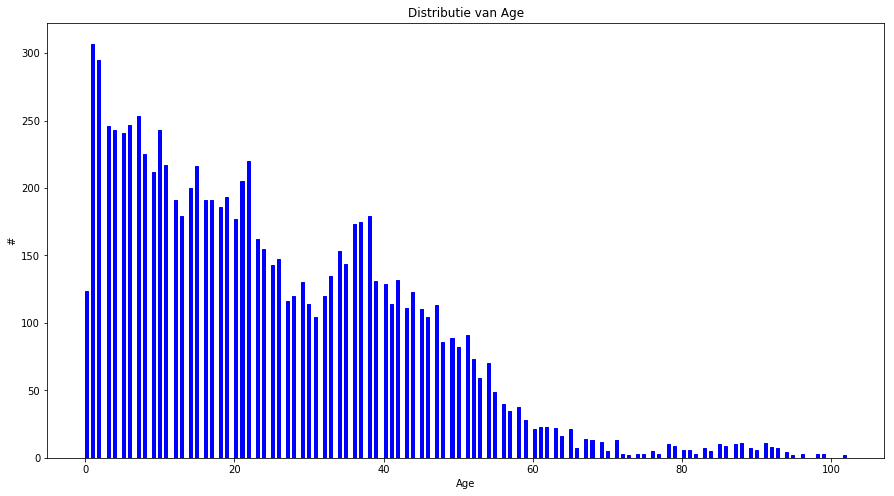

In [9]:
variable_analyzed = 'Age'

plt.figure(figsize=(15,8))
plt.hist((inputdata[variable_analyzed]), bins=250, color = 'blue', edgecolor = 'blue')
plt.title('Distributie van {}'.format(variable_analyzed))
plt.xlabel(variable_analyzed)
plt.ylabel('#')
plt.show()

<a id="3"></a> 


## 3. Prepareer de data

In [10]:
print(inputdata.shape)

(9430, 79)


In [16]:
# a) Verwijder de uitschieters (waar variabelen een onmogelijk hoge waarde hebben)

inputdata = inputdata[~(inputdata['ONTWATERINGSDIEPTE']<=-30)]

In [15]:
# b) Verwerk missende waardes

inputdata = inputdata.fillna(inputdata.mean())

In [14]:
# c ) Maak een dummy van de te voorspellen variabele

inputdata['GESTOORDASSET_TH05'] = inputdata['GESTOORDASSET_TH05'].astype(int)

<a id="4"></a> 


## 4. Analyse

In [58]:
inputdata.columns.values

array(['Unnamed: 0', 'GESTOORDASSET_TH05', 'GRONDZAKKING',
       'ONTWATERINGSDIEPTE', 'DATUM_AANNEMEN_JAAR',
       'DATUM_INBEDRIJF_JAAR', 'Age', 'COX1==COX2',
       'GRONDSOORT_Bebouwing, enz', 'GRONDSOORT_Leem',
       'GRONDSOORT_Lichte klei', 'GRONDSOORT_Lichte zavel',
       'GRONDSOORT_Moerig op zand', 'GRONDSOORT_Veen', 'GRONDSOORT_Water',
       'GRONDSOORT_Zand', 'GRONDSOORT_Zware klei',
       'GRONDSOORT_Zware zavel', 'KABEL_COX1_GPLK',
       'KABEL_COX1_GPLK_NA_1978', 'KABEL_COX1_GPLK_VOOR_1978',
       'KABEL_COX1_Onbekend', 'KABEL_COX1_Overig', 'KABEL_COX1_XLPE',
       'KABEL_COX2_GPLK', 'KABEL_COX2_GPLK_NA_1978',
       'KABEL_COX2_GPLK_VOOR_1978', 'KABEL_COX2_Onbekend',
       'KABEL_COX2_Overig', 'KABEL_COX2_XLPE',
       'CONSTRUCTIE_EXP_Gietharsmof', 'CONSTRUCTIE_EXP_Kabeldon',
       'CONSTRUCTIE_EXP_Krimpmof', 'CONSTRUCTIE_EXP_Kunststofmof',
       'CONSTRUCTIE_EXP_Lovinolmof', 'CONSTRUCTIE_EXP_Massamof',
       'CONSTRUCTIE_EXP_Nekaldietmof', 'CONSTRUCTIE_EX

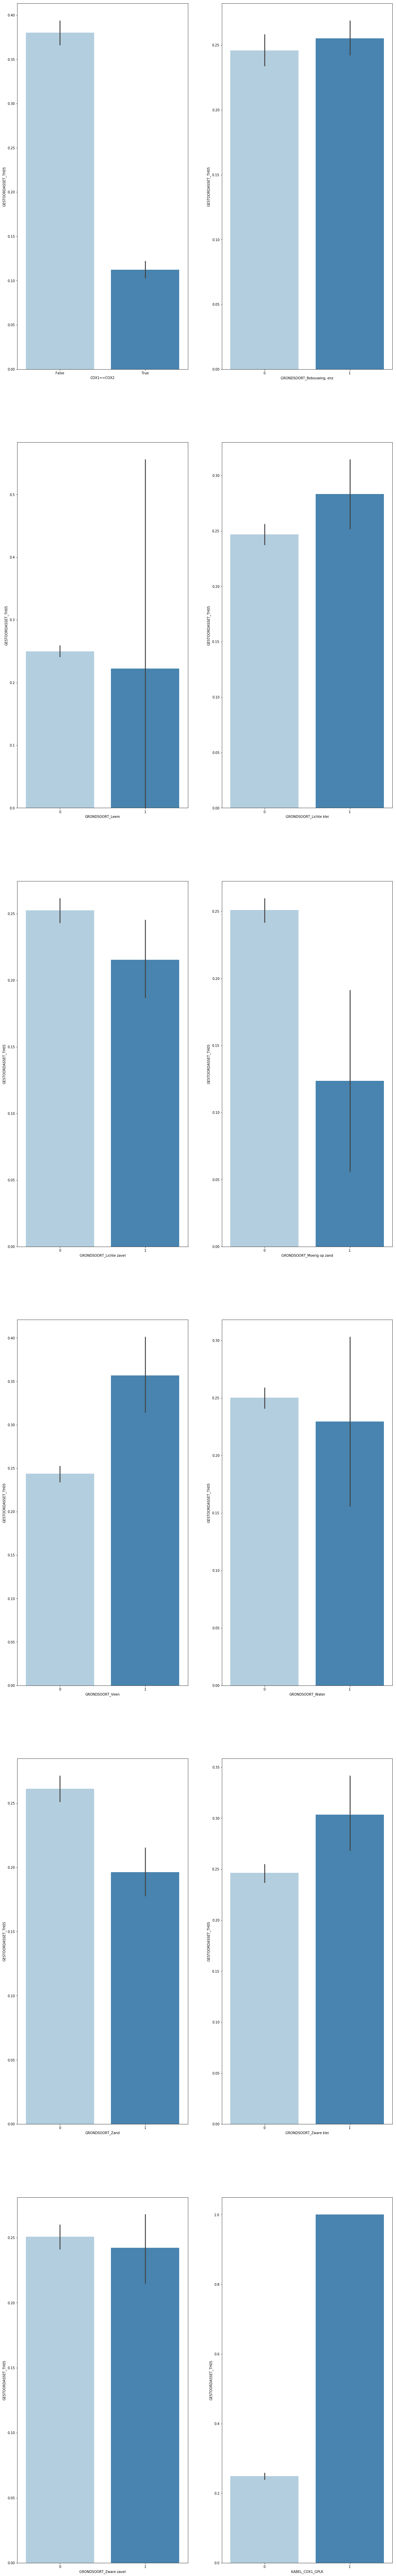

In [17]:
# a) Maak een staafdiagram om de relatie tussen de dummies en de te voorspellen variabele te onderzoeken, bekijk 
# specifieke variabelen om het aantal tabbelen overzichtelijk te houden

dummies = ['COX1==COX2',
       'GRONDSOORT_Bebouwing, enz', 'GRONDSOORT_Leem',
       'GRONDSOORT_Lichte klei', 'GRONDSOORT_Lichte zavel',
       'GRONDSOORT_Moerig op zand', 'GRONDSOORT_Veen', 'GRONDSOORT_Water',
       'GRONDSOORT_Zand', 'GRONDSOORT_Zware klei',
       'GRONDSOORT_Zware zavel', 'KABEL_COX1_GPLK'
          ]


plt.figure(figsize=(20,140))
for i, column in enumerate(dummies):
    plt.subplot(math.ceil(len(dummies)/2), 2, i+1)
    sns.barplot(inputdata[column], inputdata[target], palette='Blues')
plt.show()

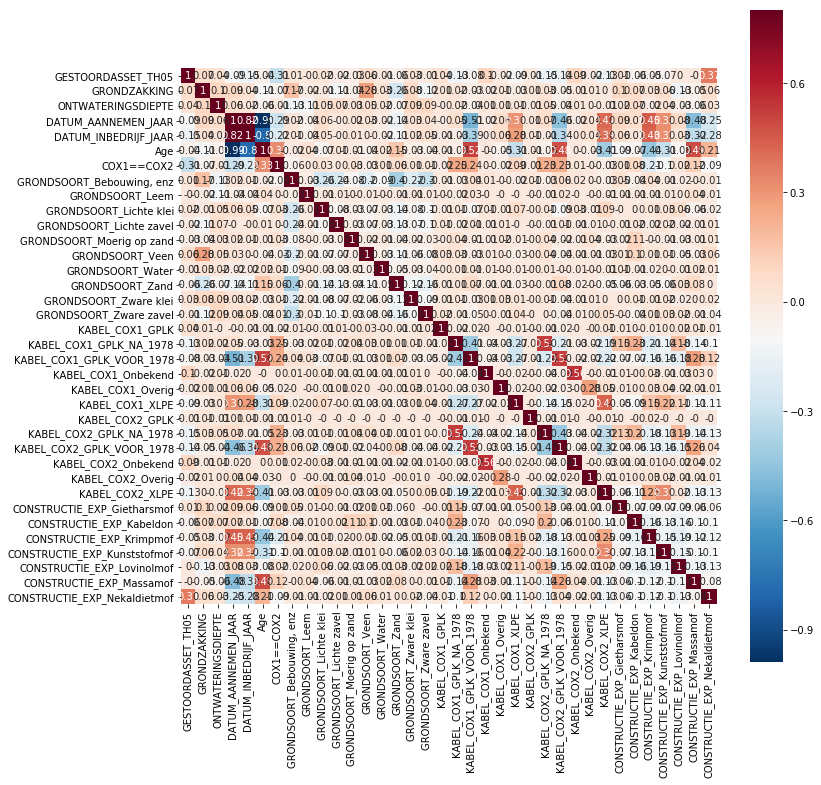

In [18]:
#  b) Laat een correlatie matrix zien om correlaties tussen alle variabelen te onderzoeken, bekijk
# specifieke variabelen om de matrix overzichtelijk te houden

columns = ['GESTOORDASSET_TH05', 'GRONDZAKKING',
       'ONTWATERINGSDIEPTE', 'DATUM_AANNEMEN_JAAR',
       'DATUM_INBEDRIJF_JAAR', 'Age', 'COX1==COX2',
       'GRONDSOORT_Bebouwing, enz', 'GRONDSOORT_Leem',
       'GRONDSOORT_Lichte klei', 'GRONDSOORT_Lichte zavel',
       'GRONDSOORT_Moerig op zand', 'GRONDSOORT_Veen', 'GRONDSOORT_Water',
       'GRONDSOORT_Zand', 'GRONDSOORT_Zware klei',
       'GRONDSOORT_Zware zavel', 'KABEL_COX1_GPLK',
       'KABEL_COX1_GPLK_NA_1978', 'KABEL_COX1_GPLK_VOOR_1978',
       'KABEL_COX1_Onbekend', 'KABEL_COX1_Overig', 'KABEL_COX1_XLPE',
       'KABEL_COX2_GPLK', 'KABEL_COX2_GPLK_NA_1978',
       'KABEL_COX2_GPLK_VOOR_1978', 'KABEL_COX2_Onbekend',
       'KABEL_COX2_Overig', 'KABEL_COX2_XLPE',
       'CONSTRUCTIE_EXP_Gietharsmof', 'CONSTRUCTIE_EXP_Kabeldon',
       'CONSTRUCTIE_EXP_Krimpmof', 'CONSTRUCTIE_EXP_Kunststofmof',
       'CONSTRUCTIE_EXP_Lovinolmof', 'CONSTRUCTIE_EXP_Massamof',
       'CONSTRUCTIE_EXP_Nekaldietmof'
          ]

correlation = inputdata[columns]
corrmat = correlation.corr().round(2)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdBu_r')
plt.show()


<a id="5"></a> 


## 5. Splits train- en testset

In [19]:
data_train, data_test  = train_test_split(inputdata, test_size=0.2, random_state=random.seed(1618))

<a id="6"></a> 


## 6. Train en valideer modellen

<a id="6a"></a> 
## Decision Tree

In [20]:
# Laat de namen van alle variabelen zien
data_train.columns.values

array(['Unnamed: 0', 'GESTOORDASSET_TH05', 'GRONDZAKKING',
       'ONTWATERINGSDIEPTE', 'DATUM_AANNEMEN_JAAR',
       'DATUM_INBEDRIJF_JAAR', 'Age', 'COX1==COX2',
       'GRONDSOORT_Bebouwing, enz', 'GRONDSOORT_Leem',
       'GRONDSOORT_Lichte klei', 'GRONDSOORT_Lichte zavel',
       'GRONDSOORT_Moerig op zand', 'GRONDSOORT_Veen', 'GRONDSOORT_Water',
       'GRONDSOORT_Zand', 'GRONDSOORT_Zware klei',
       'GRONDSOORT_Zware zavel', 'KABEL_COX1_GPLK',
       'KABEL_COX1_GPLK_NA_1978', 'KABEL_COX1_GPLK_VOOR_1978',
       'KABEL_COX1_Onbekend', 'KABEL_COX1_Overig', 'KABEL_COX1_XLPE',
       'KABEL_COX2_GPLK', 'KABEL_COX2_GPLK_NA_1978',
       'KABEL_COX2_GPLK_VOOR_1978', 'KABEL_COX2_Onbekend',
       'KABEL_COX2_Overig', 'KABEL_COX2_XLPE',
       'CONSTRUCTIE_EXP_Gietharsmof', 'CONSTRUCTIE_EXP_Kabeldon',
       'CONSTRUCTIE_EXP_Krimpmof', 'CONSTRUCTIE_EXP_Kunststofmof',
       'CONSTRUCTIE_EXP_Lovinolmof', 'CONSTRUCTIE_EXP_Massamof',
       'CONSTRUCTIE_EXP_Nekaldietmof', 'CONSTRUCTIE_EX

In [55]:
# Definieer X en y 
# Definieer X en y
X_variables = [
'ONTWATERINGSDIEPTE', 'Age',
'CONSTRUCTIE_COX_Nekaldietmof', 'CONSTRUCTIE_ORIG_Nekaldietmof', 'COX1==COX2',
'GRONDSOORT_Leem',
'DATUM_AANNEMEN_JAAR', 'DATUM_INBEDRIJF_JAAR',
'GRONDSOORT_Moerig op zand', 'KABEL_COX2_GPLK_VOOR_1978',
'KABEL_COX1_GPLK_VOOR_1978', 'KABEL_COX2_XLPE', 'KABEL_COX2_GPLK_NA_1978', 'CONSTRUCTIE_COX_Krimpmof', 'CONSTRUCTIE_EXP_Lovinolmof',
'CONSTRUCTIE_COX_LOVINOL_3']




y_variable = 'GESTOORDASSET_TH05'



X_train = data_train.loc[:, X_variables]
y_train = data_train[y_variable]
X_test = data_test.loc[:, X_variables]
y_test = data_test[y_variable]

In [56]:
# a) Kies de model parameters 
#    Note: als Min_bucket te groot is, kan de tree mogelijk niet splitsen, als het te klein is wordt de tree misschien te 
#    groot om te interpreteren
Min_num_splits = 50                            # Minimum hoeveelheid van items te splitten
Min_bucket     = math.floor(Min_num_splits/3)  # Minimum hoeveelheid van items per bucket
Max_depth      = 5                             # Maximum depth of final tree (nr of levels)

In [57]:
# b) Estimate het model 
mytree = DecisionTreeClassifier(max_depth=Max_depth
                                ,min_samples_split=Min_num_splits
                                ,min_samples_leaf=Min_bucket
                                ,criterion="gini"              
                                ,splitter="best"
                                ,random_state=random.seed()
                                )

mytree.fit(X_train, y_train)     # Fit the model over the train set

DecisionTreeClassifier(max_depth=5, min_samples_leaf=16, min_samples_split=50)

In [58]:
# c) Maak voorspellingen voor de test set
preds_proba = mytree.predict_proba(X_test)
preds = mytree.predict(X_test)   # Cut-off punt is 0.5

#    Laat de eerste 5 rijen van de voorspelling probabilities en de overeenkomende voorspelling zien
pd.concat([pd.DataFrame(preds_proba, columns=["Prob. 0", "Prob. 1"]), pd.DataFrame(preds, columns=["Prediction"])], axis=1).head()

,Prob. 0,Prob. 1,Prediction
0,0.026718,0.973282,1
1,0.581081,0.418919,0
2,0.581081,0.418919,0
3,0.000000,1.000000,1
4,0.861511,0.138489,0


In [59]:
#    Bereken het optimale cut-off punt
cost_TP = 50
cost_TN = 0
cost_FP = 50
cost_FN = 100
total_cost = math.inf

for i in np.linspace(0,1,100,endpoint=False):
    y_pred = (preds_proba[:,1]>i).astype('int')
    results = metrics.confusion_matrix(y_pred,y_test)
    TN = results[0][0]
    FN = results[0][1]
    FP = results[1][0]
    TP = results[1][1]
    
    # Bereken cutoff-punt
    cost = TN*cost_TN + TP*cost_TP + FP*cost_FP + FN*cost_FN
    total_cost = min(total_cost,cost)
    if(total_cost == cost):
        opt_cutoff = i
        
print('Optimale cut-off:', opt_cutoff)

#    Maak voorspellingen voor de test set met het optimale cut-off punt
preds = (preds_proba[:,1] > opt_cutoff).astype('int')
print(preds)

Optimale cut-off: 0.8200000000000001
[1 0 0 ... 0 0 0]


In [60]:
#    bepaal wat de 200 moffen zijn met de grootste kans om te falen
chanceOfFailure = preds_proba[:,1]

moffenPerJaar = 200
cutOffChance = np.sort(chanceOfFailure)[::-1][moffenPerJaar]

predictions = np.array([True if chance > cutOffChance else False for chance in chanceOfFailure])

index_values = np.where(predictions == True)
print(index_values)

(array([   0,    3,   10,   12,   22,   40,   75,   80,   82,   87,  105,
        129,  130,  131,  133,  140,  165,  169,  175,  224,  251,  253,
        255,  280,  287,  301,  304,  305,  309,  317,  319,  325,  331,
        332,  339,  349,  354,  356,  365,  369,  370,  373,  374,  375,
        384,  392,  400,  426,  431,  471,  472,  483,  484,  486,  502,
        505,  506,  522,  546,  552,  553,  567,  568,  579,  603,  619,
        649,  650,  668,  672,  676,  698,  708,  717,  734,  742,  743,
        765,  799,  804,  813,  822,  826,  831,  832,  842,  856,  895,
        903,  906,  909,  921,  925,  935,  943,  953,  955,  960,  967,
        976, 1000, 1017, 1020, 1024, 1049, 1061, 1068, 1088, 1105, 1112,
       1143, 1154, 1163, 1174, 1177, 1186, 1188, 1198, 1202, 1203, 1204,
       1229, 1231, 1240, 1241, 1260, 1269, 1271, 1280, 1284, 1299, 1303,
       1305, 1309, 1324, 1344, 1345, 1347, 1364, 1383, 1389, 1394, 1397,
       1401, 1407, 1412, 1424, 1435, 1442, 1448, 1

         fpr      tpr     1-fpr        tf  thresholds
10  0.175105  0.79085  0.824895 -0.034045    0.337662


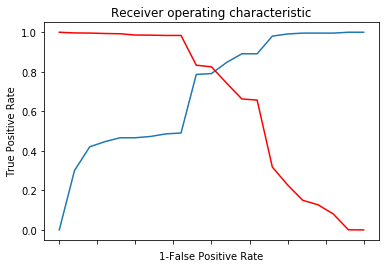

In [61]:
#    Plot tpr vs 1-fpr
fpr, tpr, t = metrics.roc_curve(y_test, preds_proba[:,1])
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i)
                    ,'1-fpr' : pd.Series(1-fpr, index = i)
                    ,'tf' : pd.Series(tpr - (1-fpr), index = i)
                    ,'thresholds' : pd.Series(t, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('1-False Positive Rate')
ax.set_xticklabels([])
plt.show()

In [62]:
# d) Evalueer resultaten
#    i. Maak een confusion matrix
print(pd.crosstab(preds, y_test))

GESTOORDASSET_TH05     0    1
row_0                        
0                   1411  245
1                     11  214


In [31]:
#    ii. Maak een classificatie rapport
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1422
           1       0.70      0.35      0.47       459

    accuracy                           0.80      1881
   macro avg       0.76      0.65      0.67      1881
weighted avg       0.79      0.80      0.78      1881



Feature ranking:
Feature 2 (CONSTRUCTIE_COX_Nekaldietmof) 0.286238
Feature 1 (Age) 0.203843
Feature 6 (DATUM_AANNEMEN_JAAR) 0.197605
Feature 4 (COX1==COX2) 0.164894
Feature 7 (DATUM_INBEDRIJF_JAAR) 0.144921
Feature 10 (KABEL_COX1_GPLK_VOOR_1978) 0.002499
Feature 15 (CONSTRUCTIE_COX_LOVINOL_3) 0.000000
Feature 14 (CONSTRUCTIE_EXP_Lovinolmof) 0.000000
Feature 13 (CONSTRUCTIE_COX_Krimpmof) 0.000000
Feature 12 (KABEL_COX2_GPLK_NA_1978) 0.000000
Feature 11 (KABEL_COX2_XLPE) 0.000000
Feature 9 (KABEL_COX2_GPLK_VOOR_1978) 0.000000
Feature 8 (GRONDSOORT_Moerig op zand) 0.000000
Feature 5 (GRONDSOORT_Leem) 0.000000
Feature 3 (CONSTRUCTIE_ORIG_Nekaldietmof) 0.000000
Feature 0 (ONTWATERINGSDIEPTE) 0.000000


<Figure size 540x360 with 0 Axes>

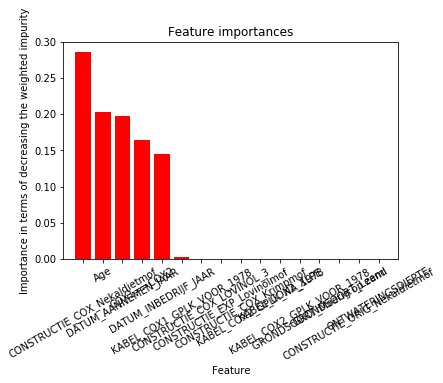

In [63]:
#    iii. Verkrijg de feature importances van de tree
importances = mytree.feature_importances_ 
std = np.std([mytree.feature_importances_], axis=0)
indices = np.argsort(importances)[::-1]

importances_features = []
print("Feature ranking:")                    # Print the feature ranking
for f in range(X_train.shape[1]):
    print("Feature %d (%s) %f" % (indices[f], X_variables[indices[f]], importances[indices[f]]))
    importances_features.append(X_variables[indices[f]])

plt.figure(figsize=(7.5,5))
plt.figure()                                 # Plot the feature importances 
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.title("Feature importances")
plt.ylabel("Importance in terms of decreasing the weighted impurity")
plt.xlabel("Feature")
plt.xticks(range(X_train.shape[1]), importances_features, rotation = 30)
plt.xlim([-1, X_train.shape[1]])
plt.show()

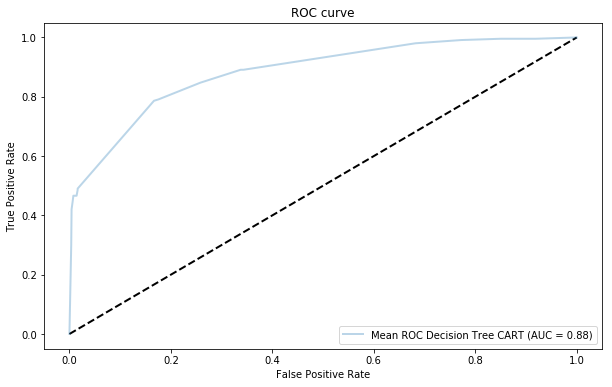

In [64]:
#    iv. Maak de ROC curve
fpr, tpr, t = metrics.roc_curve(y_test, preds_proba[:,1])

#     v. Bereken AUC
CART_roc_auc_tree = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')      # Plot results
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='Mean ROC Decision Tree CART (AUC = %0.2f)' % (CART_roc_auc_tree))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [34]:
# e) Visualizeer de Decision Tree
dot_data = StringIO()
export_graphviz(mytree, out_file=dot_data,           # mytree := name of your decision treee
                filled=True, rounded=True,
                feature_names=X_variables,
                special_characters=True)
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

<a id="6b"></a> 
## Random Forest 

In [35]:
# Definieer de train en test set

X_train = data_train.loc[:, X_variables]
y_train = data_train[y_variable]
X_test = data_test.loc[:, X_variables]
y_test = data_test[y_variable]

In [36]:
# a) Kies de model parameters 
#     Note: Je kan de grootte van je forest aanpassen met N_trees, maar let er op dat de berekeningsduur dan toeneemt
#     Note: Als Min_bucket te groot is, splitsen de trees misschien niet
N_trees        = 20                           # Hoeveelheid estimated trees
Min_num_splits = 50                            # Minimum hoeveelheid van te splitten items    
Min_bucket     = math.floor(Min_num_splits/3)  # Minimum hoeveelheid van items per bucket
Max_depth      = 7                            # Maximum depth van iedere tree (hoeveelheid levels)

In [37]:
# b) Estimate the model
forest = RandomForestClassifier(n_estimators = N_trees
                                ,criterion = "gini"            
                                ,max_depth = Max_depth
                                ,min_samples_split = Min_num_splits
                                ,min_samples_leaf = Min_bucket
                                ,random_state = random.seed()
                                )

forest.fit(X_train, y_train)   # Fit the model over the train set

RandomForestClassifier(max_depth=7, min_samples_leaf=16, min_samples_split=50,
                       n_estimators=20)

In [38]:
# c) Maak voorspellingen voor de test set
preds_proba = forest.predict_proba(X_test)
preds = forest.predict(X_test)   # Cut-off point equals 0.5

#    Laat de eerste 5 rijen van de voorspelling probabilities en de overeenkomende voorspelling zien
pd.concat([pd.DataFrame(preds_proba, columns=["Prob. 0", "Prob. 1"]), pd.DataFrame(preds, columns=["Prediction"])], axis=1).head()

,Prob. 0,Prob. 1,Prediction
0,0.698952,0.301048,0
1,0.698952,0.301048,0
2,0.762787,0.237213,0
3,0.038246,0.961754,1
4,0.698952,0.301048,0


In [39]:
#    bepaal wat de 200 moffen zijn met de grootste kans om te falen
chanceOfFailure = preds_proba[:,1]

moffenPerJaar = 200
cutOffChance = np.sort(chanceOfFailure)[::-1][moffenPerJaar]

predictions = np.array([True if chance > cutOffChance else False for chance in chanceOfFailure])

index_values = np.where(predictions == True)
print(index_values)

(array([   3,   10,   14,   22,   24,   40,   64,   68,   80,   86,   98,
        129,  133,  137,  140,  175,  216,  224,  244,  280,  284,  301,
        304,  305,  344,  349,  354,  369,  370,  376,  377,  395,  400,
        426,  429,  471,  472,  484,  486,  502,  505,  513,  522,  529,
        552,  557,  568,  571,  600,  603,  619,  627,  653,  698,  717,
        734,  742,  788,  791,  822,  831,  856,  867,  877,  878,  895,
        906,  909,  921,  930,  967,  976, 1012, 1017, 1049, 1052, 1067,
       1068, 1075, 1081, 1088, 1116, 1129, 1143, 1154, 1188, 1195, 1198,
       1203, 1212, 1231, 1241, 1284, 1299, 1321, 1345, 1357, 1364, 1367,
       1406, 1407, 1412, 1435, 1439, 1448, 1469, 1474, 1497, 1505, 1506,
       1523, 1533, 1586, 1593, 1594, 1626, 1632, 1635, 1643, 1649, 1676,
       1682, 1694, 1703, 1714, 1722, 1723, 1733, 1734, 1742, 1752, 1783,
       1785, 1788, 1791, 1796, 1797, 1802, 1805, 1811, 1833, 1838, 1865,
       1871], dtype=int64),)


In [40]:
# d) Evaluaeer resultaten
#    i. Maak een confusion matrix
print(pd.crosstab(preds, y_test))

GESTOORDASSET_TH05     0    1
row_0                        
0                   1351  297
1                     71  162


In [41]:
#    ii. Maak een classificatie rapport
print(classification_report(y_test, preds))
f1_RF = f1_score(y_test, preds)


              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1422
           1       0.70      0.35      0.47       459

    accuracy                           0.80      1881
   macro avg       0.76      0.65      0.67      1881
weighted avg       0.79      0.80      0.78      1881



Feature ranking:
Feature 1 (CONSTRUCTIE_EXP_Nekaldietmof) 0.562403
Feature 0 (COX1==COX2) 0.310943
Feature 2 (CONSTRUCTIE_COX_LOVINOL_3) 0.085985
Feature 3 (KABEL_COX1_GPLK_VOOR_1978) 0.040669


<Figure size 540x360 with 0 Axes>

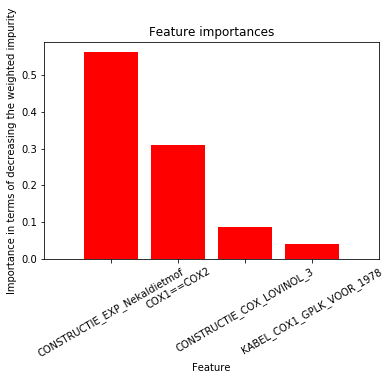

In [42]:
#    iii. Verkrijg de feature importances van de tree
importances = forest.feature_importances_ 
std = np.std([forest.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

importances_features = []
print("Feature ranking:")                    # Print the feature ranking
for f in range(X_train.shape[1]):
    print("Feature %d (%s) %f" % (indices[f], X_variables[indices[f]], importances[indices[f]]))
    importances_features.append(X_variables[indices[f]])

plt.figure(figsize=(7.5,5))
plt.figure()                                 # Plot the feature importances 
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.title("Feature importances")
plt.ylabel("Importance in terms of decreasing the weighted impurity")
plt.xlabel("Feature")
plt.xticks(range(X_train.shape[1]), importances_features, rotation = 30)
plt.xlim([-1, X_train.shape[1]])
plt.show()

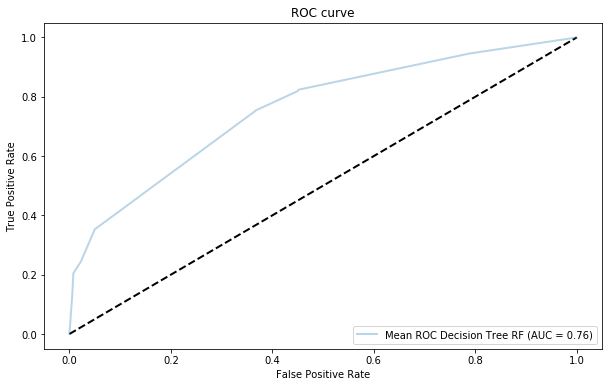

In [43]:
#    iv. Maak de ROC curve
fpr, tpr, t = metrics.roc_curve(y_test, preds_proba[:,1])

#     v. Bereken de AUC
RF_roc_auc_tree = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')      # Plot results
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='Mean ROC Decision Tree RF (AUC = %0.2f)' % (RF_roc_auc_tree))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

<a id="6v"></a> 
## XGBoost

In [66]:
# Definieer X and y 
# Definieer X en y
X_variables = [
'ONTWATERINGSDIEPTE', 'Age',
'CONSTRUCTIE_COX_Nekaldietmof', 'CONSTRUCTIE_ORIG_Nekaldietmof', 'COX1==COX2',
'GRONDSOORT_Leem',
'DATUM_AANNEMEN_JAAR', 'DATUM_INBEDRIJF_JAAR',
'GRONDSOORT_Moerig op zand', 'KABEL_COX2_GPLK_VOOR_1978',
'KABEL_COX1_GPLK_VOOR_1978', 'KABEL_COX2_XLPE', 'KABEL_COX2_GPLK_NA_1978', 'CONSTRUCTIE_COX_Krimpmof', 'CONSTRUCTIE_EXP_Lovinolmof',
'CONSTRUCTIE_COX_LOVINOL_3']




y_variable = 'GESTOORDASSET_TH05'



X_train = data_train.loc[:, X_variables]
y_train = data_train[y_variable]
X_test = data_test.loc[:, X_variables]
y_test = data_test[y_variable]

In [67]:
# a) Kies de model parameters 
N_trees        = 20                         # Hoeveelheid estimated trees
Max_depth      = 5                             # Maximum depth van iedere tree (hoeveelheid levels)
Learning_rate  = 1                             # The learning rate ('eta')
Min_bucket     = 10                           # Minimum hoeveelheid van items per bucket
Subsample      = 1                           # Subsample ratio van de training instance
Verbose        = 0                             # Of er tijdens het boosten berichten geprint moeten worden


In [68]:
# b) Estimate model
XGB = GradientBoostingClassifier( random_state=12,
     n_estimators=N_trees
                         ,max_depth=Max_depth 
                         ,learning_rate=Learning_rate
                         ,min_samples_leaf=Min_bucket
                         ,subsample=Subsample
                         ,verbose=Verbose
                      )
XGB.fit(X_train, y_train)      # Fit the model over the train set

GradientBoostingClassifier(learning_rate=1, max_depth=5, min_samples_leaf=10,
                           n_estimators=20, random_state=12, subsample=1)

In [69]:
# c) Maak voorspellingen voor de test set
preds_proba = XGB.predict_proba(X_test)
preds = XGB.predict(X_test)   # Cut-off point equals 0.5

#    Laat de eerste 5 rijen van de voorspelling probabilities en de overeenkomende voorspelling zien
pd.concat([pd.DataFrame(preds_proba, columns=["Prob. 0", "Prob. 1"]), pd.DataFrame(preds, columns=["Prediction"])], axis=1).head()


,Prob. 0,Prob. 1,Prediction
0,0.000734,0.999266,1
1,0.001530,0.998470,1
2,0.973725,0.026275,0
3,0.000069,0.999931,1
4,0.986104,0.013896,0


In [70]:
#    bepaal wat de 200 moffen zijn met de grootste kans om te falen
chanceOfFailure = preds_proba[:,1]

moffenPerJaar = 200
cutOffChance = np.sort(chanceOfFailure)[::-1][moffenPerJaar]

predictions = np.array([True if chance > cutOffChance else False for chance in chanceOfFailure])

index_values = np.where(predictions == True)
print(index_values)

(array([   3,   12,   22,   36,   75,   80,   87,   99,  129,  131,  137,
        150,  165,  174,  241,  245,  251,  253,  275,  280,  301,  303,
        304,  317,  319,  323,  325,  332,  339,  347,  349,  354,  357,
        365,  370,  373,  374,  375,  376,  378,  400,  411,  426,  434,
        447,  471,  484,  486,  502,  513,  520,  522,  526,  527,  546,
        552,  554,  555,  560,  567,  568,  579,  603,  619,  633,  650,
        668,  672,  690,  706,  708,  717,  733,  743,  754,  762,  788,
        799,  800,  804,  813,  814,  826,  832,  856,  867,  884,  895,
        903,  906,  921,  923,  925,  929,  930,  935,  937,  940,  943,
        945,  953,  955,  967,  997, 1000, 1020, 1027, 1053, 1067, 1068,
       1070, 1081, 1088, 1108, 1112, 1124, 1143, 1146, 1154, 1162, 1163,
       1172, 1177, 1186, 1188, 1198, 1212, 1219, 1229, 1241, 1248, 1269,
       1273, 1280, 1299, 1303, 1309, 1324, 1339, 1344, 1364, 1389, 1394,
       1401, 1407, 1412, 1424, 1435, 1436, 1456, 1

In [71]:
# d) Evalueer de resultaten
#    i. Maak een confusion matrix
print(pd.crosstab(preds, y_test))

GESTOORDASSET_TH05     0    1
row_0                        
0                   1409   39
1                     13  420


In [74]:
#    ii. Maak een classificatie rapport
print(classification_report(y_test, preds))
f1_XGB = f1_score(y_test, preds)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1422
           1       0.97      0.92      0.94       459

    accuracy                           0.97      1881
   macro avg       0.97      0.95      0.96      1881
weighted avg       0.97      0.97      0.97      1881



In [75]:
#    iii. Krijg de feature importances van het XGBoost model
importances = XGB.feature_importances_ 
std = np.std([XGB.feature_importances_], axis=0)
indices = np.argsort(importances)[::-1]

importances_features = []
print("Feature ranking:")                    # Print the feature ranking
for f in range(X_train.shape[1]):
    print("Feature %d (%s) %f" % (indices[f], X_variables[indices[f]], importances[indices[f]]))
    importances_features.append(X_variables[indices[f]])

if False:
    plt.figure(figsize=(7.5,5))
    plt.figure()                                 # Plot the feature importances 
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.title("Feature importances")
    plt.ylabel("Importance in terms of decreasing the weighted impurity")
    plt.xlabel("Feature")
    plt.xticks(range(X_train.shape[1]), importances_features, rotation = 30)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

Feature ranking:
Feature 1 (Age) 0.289859
Feature 6 (DATUM_AANNEMEN_JAAR) 0.272072
Feature 2 (CONSTRUCTIE_COX_Nekaldietmof) 0.173039
Feature 4 (COX1==COX2) 0.113632
Feature 7 (DATUM_INBEDRIJF_JAAR) 0.076025
Feature 11 (KABEL_COX2_XLPE) 0.023659
Feature 10 (KABEL_COX1_GPLK_VOOR_1978) 0.017380
Feature 9 (KABEL_COX2_GPLK_VOOR_1978) 0.012519
Feature 12 (KABEL_COX2_GPLK_NA_1978) 0.011743
Feature 15 (CONSTRUCTIE_COX_LOVINOL_3) 0.003623
Feature 0 (ONTWATERINGSDIEPTE) 0.003397
Feature 3 (CONSTRUCTIE_ORIG_Nekaldietmof) 0.002445
Feature 13 (CONSTRUCTIE_COX_Krimpmof) 0.000362
Feature 14 (CONSTRUCTIE_EXP_Lovinolmof) 0.000206
Feature 8 (GRONDSOORT_Moerig op zand) 0.000040
Feature 5 (GRONDSOORT_Leem) 0.000000


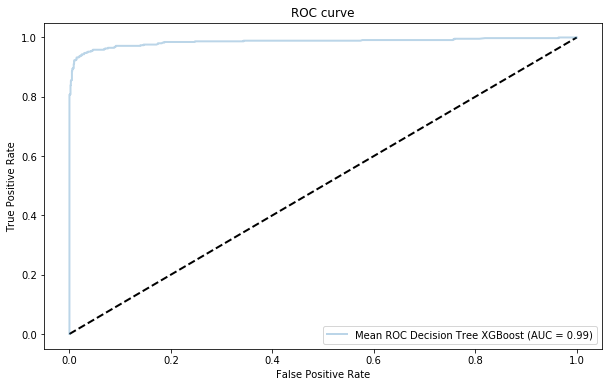

In [76]:
# Maak de ROC curve
fpr, tpr, t = metrics.roc_curve(y_test, preds_proba[:,1])

# Bereken AUC
XGB_roc_auc_tree = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')      # Plot results
plt.plot(fpr, tpr, lw=2, alpha=0.3, label='Mean ROC Decision Tree XGBoost (AUC = %0.2f)' % (XGB_roc_auc_tree))
plt.title('ROC curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Vergelijk de modellen

In [77]:
print('AUC Decision Tree:', CART_roc_auc_tree)
print('AUC Random Forest:', RF_roc_auc_tree)
print('AUC XGBoost:', XGB_roc_auc_tree)

AUC Decision Tree: 0.8838589975762144
AUC Random Forest: 0.7580006373544886
AUC XGBoost: 0.9855484466016442
